In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [4]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Extremely Randomized Trees

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples = 10000, n_features = 100, centers=100, random_state=0)

In [6]:
X

array([[  5.07831768,  -4.80422836,   5.43332156, ...,  -5.33559718,
         -8.18308608,  -1.04571271],
       [  7.11781571,  -1.29058687,   1.59869596, ...,  -4.77088702,
         -1.56677952,   6.51668345],
       [  0.77768159,  -5.82203423,  -6.78376081, ...,  10.22930201,
         -4.33262418,  -0.62595047],
       ..., 
       [  5.65939718,  -3.01538405,  -4.8787034 , ...,   8.37580673,
         -4.90250735,   4.51129805],
       [ -3.60315572,   9.36440941,   1.37373074, ...,   1.40103152,
          9.86163446,  -8.05947692],
       [ -7.56817754,   3.32137589,   4.45327373, ...,   1.72524139,
          5.12431642,  -7.50802634]])

In [7]:
y

array([ 1, 20, 52, ...,  9, 48, 26])

In [8]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)

In [9]:
scores

array([ 0.98      ,  0.98272727,  0.98363636])

In [10]:
scores.mean()

0.98212121212121206

In [11]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
scores.mean()

1.0

In [12]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)

In [14]:
scores.mean() > 0.999

True

AdaBoost Classifer - fit

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.95996732026143794

Gradient Tree Boosting

Classification

In [18]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score( X_test, y_test)

0.91300000000000003

Regression

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
X, y = make_friedman1(n_samples=1200, noise=1.0, random_state=0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
est.score(X_test, y_test)

0.8058912110043196

In [22]:
mean_squared_error(y_test, est.predict(X_test))

5.0091548599603213

Fitting additional weak learners

In [23]:
_ = est.set_params(n_estimators = 200, warm_start=True)
_ = est.fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

3.8402347411053559

Feature Importance

In [24]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100 , learning_rate=1.0, random_state=0, max_depth=1).fit(X, y)
clf.feature_importances_

array([ 0.11,  0.1 ,  0.11,  0.1 ,  0.09,  0.11,  0.09,  0.1 ,  0.1 ,  0.09])

In [25]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features)

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
fig, axs = plot_partial_dependence(mc_clf, iris.data, features, label=0) 

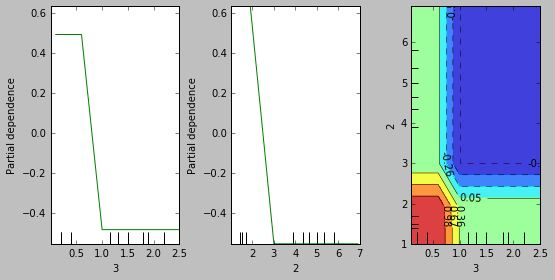

In [32]:
fig

In [31]:
import matplotlib
%matplotlib inline

In [33]:
axs

In [35]:
for ax in axs:
    print(ax)

Axes(0.1,0.15;0.223684x0.55)
Axes(0.413158,0.15;0.223684x0.55)
Axes(0.726316,0.15;0.223684x0.55)


In [36]:
from sklearn.ensemble.partial_dependence import partial_dependence
pdp, axs = partial_dependence(clf, [0], X=X)

In [37]:
pdp

array([[ 2.46643157,  2.46643157,  2.46643157,  2.46643157,  2.46643157,
         2.46643157,  1.15418258,  1.15418258,  1.15418258,  1.15418258,
         1.15418258,  0.61847569,  0.61847569,  0.61847569,  0.61847569,
         0.61847569,  0.61847569,  0.61847569,  0.61847569, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.03524098, -0.03524098, -0.03524098, -0.03524098, -0.03524098,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.41817365, -0.41817365,
        -0.41817365, -0.41817365, -0.41817365, -0.4

In [39]:
axs

[array([-1.62497054, -1.59201391, -1.55905727, -1.52610063, -1.49314399,
        -1.46018736, -1.42723072, -1.39427408, -1.36131744, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653425, -1.16357762,
        -1.13062098, -1.09766434, -1.0647077 , -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627142, -0.60331478, -0.57035814, -0.5374015 , -0.50444487,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966168,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783513, -0.17487849,
        -0.14192185, -0.10896521, -0.07600858, -0.04305194, -0.0100953 ,
         0.02286134,  0.05581797,  0.08877461,  0.12173125,  0.15468789,
         0.18764452,  0.22060116,  0.2535578 ,  0.28651444,  0.31947107,
         0.35242771,  0.38538435,  0.41834099,  0.45129762,  0.48425426,
         0.5172109 ,  0.55016754,  0.58312418,  0.6

Voting Classifier

In [40]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [42]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [43]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

In [44]:
eclf = VotingClassifier(estimators=[('lr', clf1),('rf', clf2),('gnb', clf3)], voting='hard')

In [45]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest Classifier]
Accuracy: 0.91 (+/- 0.04) [Gaussian Naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


Weighted Average Probabilites (Soft Voting)

In [46]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

In [47]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [49]:
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1),('knn', clf2),('svc', clf3)], voting='soft', weights=[2, 1, 2])

In [50]:
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

Using the Voting Classifier with GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators':[20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid = params, cv =5)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start..., GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)